# Подготовка

In [ ]:
!pip3 install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 22.3 MB/s eta 0:00:00


In [ ]:
!pip3 install boxmot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━

In [ ]:
!pip3 install gdown

# Простой трекинг

In [ ]:
!gdown 1IvSkOEjUeTMHjOk_SS2qLvT45cO6SAv0

Downloading...
From (original): https://drive.google.com/uc?id=1IvSkOEjUeTMHjOk_SS2qLvT45cO6SAv0
From (redirected): https://drive.google.com/uc?id=1IvSkOEjUeTMHjOk_SS2qLvT45cO6SAv0&confirm=t&uuid=5ce6698e-9820-4209-900a-ef724b425b8b
To: /content/result.tar.gz
100% 372M/372M [00:03<00:00, 104MB/s]


In [ ]:
!tar -xf result.tar.gz

Скопируем для удобства среднюю модель

In [ ]:
!cp ./content/dataset/runs/detect/train5/weights/best.pt ./ring_model_m.pt

In [ ]:
from ultralytics import YOLO

detector = YOLO("./ring_model_m.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!gdown 1T5zN5vqLscTlKDhfR4n_GvY-5UL1lzM7

Downloading...
From: https://drive.google.com/uc?id=1T5zN5vqLscTlKDhfR4n_GvY-5UL1lzM7
To: /content/ring_video.mp4
100% 24.3M/24.3M [00:00<00:00, 32.6MB/s]


In [ ]:
def draw_detections(frame, detections):
  frame_with_detections = frame.copy() # делаем .copy(), т.к. без этого мы просто получим ссылку на оригинальную переменную
  for data in detections.boxes.data.tolist():
        xmin, ymin, xmax, ymax, confidence, class_id = data
        xmin = int(xmin)
        ymin = int(ymin)
        xmax = int(xmax)
        ymax = int(ymax)
        class_id = int(class_id)

        # draw a bounding box rectangle and label on the image
        thickness = 5
        color = [255, 0, 0]
        cv2.rectangle(frame_with_detections, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
        text = f"Ring : {confidence:.2f}"
        # calculate text width & height to draw the transparent boxes as background of the text
        (text_width, text_height) = \
        cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2)[0]
        text_offset_x = xmin
        text_offset_y = ymin - 5
        box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
        overlay = frame_with_detections.copy()
        cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
        # add opacity (transparency to the box)
        frame_with_detections = cv2.addWeighted(overlay, 0.6, frame_with_detections, 0.4, 0)
        # now put the text (label: confidence %)
        cv2.putText(frame_with_detections, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1, color=(0, 0, 0), thickness=2)
  return frame_with_detections

In [ ]:
import cv2

cap = cv2.VideoCapture('./ring_video.mp4')
writer = cv2.VideoWriter(
    'result.mp4',
    cv2.VideoWriter_fourcc(*'MP4V'),
    25,
    (int(cap.get(3)),int(cap.get(4)))
)

counter = 0

while cap.isOpened():
  ret, frame = cap.read()

  print(counter)
  counter += 1

  if not ret:
    break

  results = detector.predict(frame, verbose=False, classes=[0])
  detections_frame = draw_detections(frame, results[0])
  writer.write(detections_frame)

cap.release()
writer.release()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240


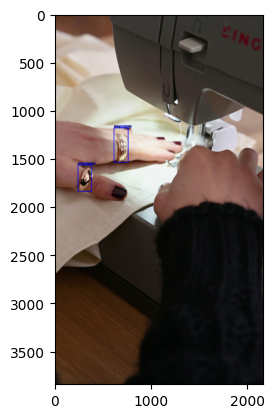

In [ ]:
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('./result.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 120)

ret, frame = cap.read()

frame_to_show = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_to_show)

In [ ]:
from boxmot.trackers.bytetrack.bytetrack import ByteTrack

tracker = ByteTrack()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [ ]:
import numpy as np

def convert_yolo_numpy(detections):
  numpy_detections = []
  for data in detections.boxes.data.tolist():
        xmin, ymin, xmax, ymax, confidence, class_id = data
        xmin = int(xmin)
        ymin = int(ymin)
        xmax = int(xmax)
        ymax = int(ymax)
        class_id = int(class_id)
        numpy_detections.append([xmin, ymin, xmax, ymax, confidence, class_id])
  return np.array(numpy_detections)

In [ ]:
def draw_tracks_bytetrack(frame, detections, tracks):
  tracked_frame = frame.copy()
  for coordinates in tracks:
    cv2.drawMarker(tracked_frame, coordinates, color=(0, 255, 0), thickness=1,
                markerType= cv2.MARKER_TILTED_CROSS, line_type=cv2.LINE_AA,
                markerSize=100)
  for data in detections:
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    thickness = 5
    color = [255, 0, 0]
    cv2.rectangle(tracked_frame, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
    text = str(data[4])
    # calculate text width & height to draw the transparent boxes as background of the text
    (text_width, text_height) = \
    cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2)[0]
    text_offset_x = xmin
    text_offset_y = ymin - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = tracked_frame.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    tracked_frame = cv2.addWeighted(overlay, 0.6, tracked_frame, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(tracked_frame, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(0, 0, 0), thickness=2)
    cv2.drawMarker(tracked_frame, (cx, cy), color=(0, 255, 0), thickness=1,
                markerType= cv2.MARKER_TILTED_CROSS, line_type=cv2.LINE_AA,
                markerSize=100)
    tracks.append((cx, cy))

  return tracked_frame, tracks

In [ ]:
tracks = []

cap = cv2.VideoCapture('./ring_video.mp4')
writer = cv2.VideoWriter(
    'result_bytrack.mp4',
    cv2.VideoWriter_fourcc(*'MP4V'),
    25,
    (int(cap.get(3)),int(cap.get(4)))
)

while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    break

  results = detector.predict(frame, verbose=False)
  numpy_detections = convert_yolo_numpy(results[0])
  print(numpy_detections)
  detections = tracker.update(numpy_detections, frame)
  print(detections)
  tracked_frame, tracks = draw_tracks_bytetrack(frame, detections, tracks)


  writer.write(tracked_frame)

cap.release()
writer.release()

[[          1        1047        1334        1830     0.86932           0]
 [         28        1276        2152        3835     0.47367          16]
 [         48        1291        2155        3835     0.34336           0]]
[]
[[          0        1055        1364        1827     0.85767           0]
 [         25        1276        2153        3835     0.53602          16]
 [         42        1292        2155        3835     0.37204           0]]
[[     19.844      1053.4      1338.4      1827.6          13     0.85767           0           0]
 [      27.18        1276      2151.2        3835          14     0.53602          16           1]]
[[          3        1061        1330        1815     0.85459           0]
 [         24        1272        2152        3835     0.76849          16]]
[[     22.982      1059.3      1315.7      1817.9          13     0.85459           0           0]
 [     24.969      1272.9      2151.6        3835          14     0.76849          16           

KeyboardInterrupt: 

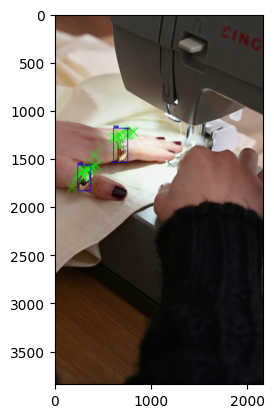

In [ ]:
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('./result_bytrack.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 120)

ret, frame = cap.read()

frame_to_show = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_to_show)

# Облако интересов

In [ ]:
!gdown 1XqhYWzTLT-JNQ83qYqBrc5YyR4EOV3jv

Downloading...
From: https://drive.google.com/uc?id=1XqhYWzTLT-JNQ83qYqBrc5YyR4EOV3jv
To: /content/area_count.mp4
100% 2.82M/2.82M [00:00<00:00, 235MB/s]


In [ ]:
from ultralytics import YOLO
from boxmot.trackers.bytetrack.bytetrack import ByteTrack

detector = YOLO('yolov8m.pt')
tracker = ByteTrack()

In [ ]:
def get_detections_in_area(tracked_detections, area_top_left, area_bottom_right):
  area_xmin, area_ymin = area_top_left
  area_xmax, area_ymax = area_bottom_right

  detections_in_area = []

  for data in tracked_detections:
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    obj_id = int(data[4])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    if (area_xmin <= cx <= area_xmax) and (area_ymin <= cy <= area_ymax):
      detections_in_area.append(obj_id)

  return detections_in_area

In [ ]:
def process_frame(frame, detections, counter, alr_tracked):
  roi_frame = frame.copy()
  global area_top_left
  global area_bottom_right
  area_xmin, area_ymin = area_top_left
  area_xmax, area_ymax = area_bottom_right
  tracked_id = get_detections_in_area(detections, area_top_left, area_bottom_right)
  cv2.rectangle(roi_frame, (area_xmin, area_ymin), (area_xmax, area_ymax), color=(255,128,255), thickness=3)
  for data in detections:
    if int(data[6]) != 0:
      continue
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    if (data[4] not in alr_tracked) and (data[4] in tracked_id):
      counter += 1
      alr_tracked.append(data[4])
    thickness = 2
    color = [255, 0, 0]
    cv2.rectangle(roi_frame, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
    text = str(data[4])
    # calculate text width & height to draw the transparent boxes as background of the text
    (text_width, text_height) = \
    cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2)[0]
    text_offset_x = xmin
    text_offset_y = ymin - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = roi_frame.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    roi_frame = cv2.addWeighted(overlay, 0.6, roi_frame, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(roi_frame, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(0, 0, 0), thickness=2)
    cv2.putText(roi_frame, str(counter), (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(255, 0, 0), thickness=2)
  return roi_frame, counter, alr_tracked

In [ ]:
import cv2

cap = cv2.VideoCapture('./area_count.mp4')
writer = cv2.VideoWriter('./detections_in_area.mp4',
                         cv2.VideoWriter_fourcc(*'MP4V'),
                         25,
                         (int(cap.get(3)),int(cap.get(4)))
                        )

area_top_left = (700, 0)
area_bottom_right = (850, 370)
counter = 0
alr_tracked = []
while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    break

  detections = detector.predict(frame, verbose=False)
  numpy_detections = convert_yolo_numpy(detections[0])
  tracks = tracker.update(numpy_detections, frame)

  print(tracks)
  roi_frame, counter, alr_tracked = process_frame(frame, tracks, counter, alr_tracked)
  writer.write(roi_frame)

cap.release()
writer.release()

[[    0.34949      94.714      262.29         363           8     0.85457           7           1]
 [     339.27      160.81      523.13      328.83         208     0.89233           0           0]
 [     297.15      184.06      403.23         290         197     0.38289           1           6]
 [     250.12       216.6      317.58      298.36         191     0.62748           1           3]]
[[    0.30301      94.214      262.57         363           8     0.85372           7           1]
 [     337.45      154.48      536.83      346.25         208     0.89231           0           0]
 [     299.67      187.03      402.66         290         197     0.38273           1           6]
 [     250.65       217.6      317.27      298.11         191     0.62661           1           3]
 [        468         144         549         331         227     0.83971           0           2]
 [        564         143         581         189         228     0.46232           0           5]
 [       

# Сравнение методов трекинга

In [ ]:
def process_frame(frame):
  img_hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
  frame = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
  image_threshold = cv2.inRange(frame, (223, 232, 188), (243, 242, 207))
  img = image_threshold
  plt.imshow(img, cmap='gray')
  return img


In [ ]:
def find_centroid(img):
  contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    moments = cv2.moments(largest_contour)
    if moments["m00"] != 0:
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
    else:
        cx, cy = 0, 0  # Fallback if the area is zero
    print(f"Centroid of white pixels: ({cx}, {cy})")
    return (cx, cy)

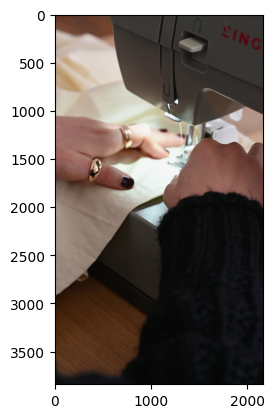

In [ ]:
cap = cv2.VideoCapture("./ring_video.mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, 1)
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)

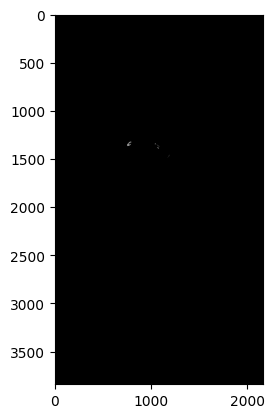

In [ ]:
img = process_frame(frame_rgb)

Centroid of white pixels: (766, 1349)


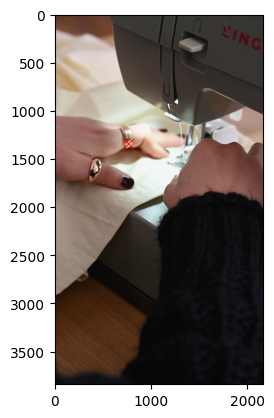

In [ ]:
coordinates = find_centroid(img.astype(np.uint8))
cv2.drawMarker(frame_rgb, coordinates, color=(255, 0, 0), thickness=10,
   markerType= cv2.MARKER_TILTED_CROSS, line_type=cv2.LINE_AA,
   markerSize=100)
plt.imshow(frame_rgb)
cap.release()

Centroid of white pixels: (760, 1347)
Centroid of white pixels: (766, 1349)
Centroid of white pixels: (765, 1352)
Centroid of white pixels: (751, 1360)
Centroid of white pixels: (1042, 1302)
Centroid of white pixels: (651, 1166)
Centroid of white pixels: (1458, 1308)
Centroid of white pixels: (1427, 1322)
Centroid of white pixels: (1415, 1327)
Centroid of white pixels: (1415, 1331)
Centroid of white pixels: (0, 0)
Centroid of white pixels: (0, 0)
Centroid of white pixels: (0, 0)
Centroid of white pixels: (1416, 1336)
Centroid of white pixels: (1411, 1336)
Centroid of white pixels: (1412, 1338)
Centroid of white pixels: (0, 0)
Centroid of white pixels: (0, 0)
Centroid of white pixels: (0, 0)
Centroid of white pixels: (829, 1495)
Centroid of white pixels: (839, 1481)
Centroid of white pixels: (850, 1474)
Centroid of white pixels: (858, 1468)
Centroid of white pixels: (869, 1460)
Centroid of white pixels: (875, 1455)
Centroid of white pixels: (876, 1454)
Centroid of white pixels: (878, 14

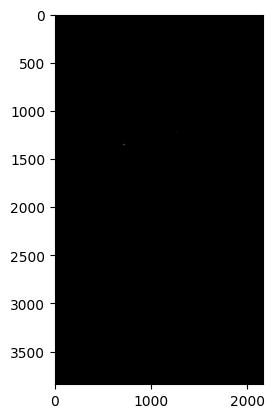

In [ ]:
cap = cv2.VideoCapture("./ring_video.mp4")
writer = cv2.VideoWriter('./lr1_result.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (int(cap.get(3)),int(cap.get(4))))
mas = []
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == True:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = process_frame(frame_rgb)
    mas.append(find_centroid(img.astype(np.uint8)))
    for coordinates in mas:
      cv2.drawMarker(frame_rgb, coordinates, color=(255, 0, 0), thickness=5,
        markerType= cv2.MARKER_TILTED_CROSS, line_type=cv2.LINE_AA,
        markerSize=100
      )
    writer.write(cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR))


  # Break the loop
  else:
    break

# When everything done, release the video capture object
cap.release()
writer.release()

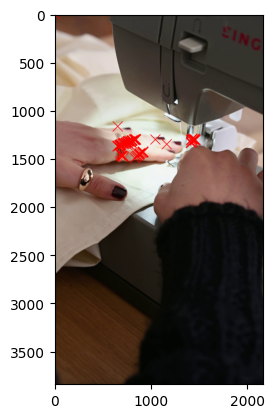

In [ ]:
cap = cv2.VideoCapture("./lr1_result.mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, 120)
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)

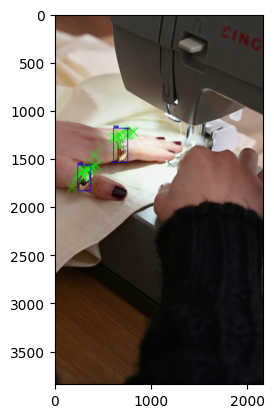

In [ ]:
cap = cv2.VideoCapture("./result_bytrack.mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, 120)
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)

Видно, что результат с моделью из ЛР 2 гораздо лучше

# Оценка скорости объекта

In [ ]:
!gdown 1w4_qiQMIItQ9nS7avD6T3ldp74LXy_3Z

Downloading...
From: https://drive.google.com/uc?id=1w4_qiQMIItQ9nS7avD6T3ldp74LXy_3Z
To: /content/vehicles.mp4
100% 35.3M/35.3M [00:00<00:00, 56.9MB/s]


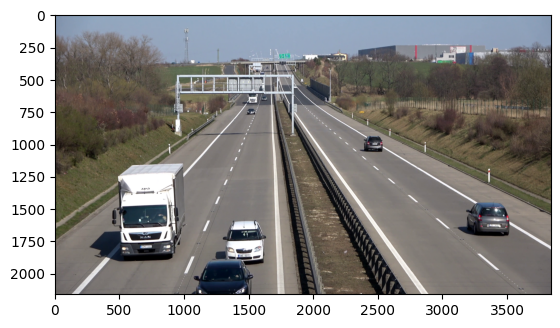

In [ ]:
import matplotlib.pyplot as plt
import cv2

cap = cv2.VideoCapture('vehicles.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 50)

ret, frame = cap.read()

frame_to_show = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_to_show)
cap.release()

In [ ]:
# Зададим матрицы в программе
import numpy as np

image_matrix = np.array([
    [1252, 787],
    [2298, 803],
    [5039, 2159],
    [-550, 2159]
])

road_matrix = np.array([
    [0, 0],
    [24, 0],
    [24, 249],
    [0, 249],
])

image_matrix = image_matrix.astype(np.float32)
road_matrix = road_matrix.astype(np.float32)

perspective_matrix = cv2.getPerspectiveTransform(image_matrix, road_matrix)
print(perspective_matrix)

[[  -0.015317   -0.020117      35.009]
 [   0.010338    -0.67587      518.97]
 [  4.152e-05  -0.0022122           1]]


In [ ]:
# готовим детектор и трекер
from ultralytics import YOLO
from boxmot.trackers.bytetrack.bytetrack import ByteTrack

detector = YOLO('yolov8m.pt')
tracker = ByteTrack()
classes = [2, 7]

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [ ]:
import math

def process_frame(frame, detections, perspective_matrix, detect_points):
  process_frame = frame.copy()
  for data in detections:
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    thickness = 5
    color = [255, 0, 0]

    center_coord = cv2.perspectiveTransform(np.array([cx, cy]).reshape(-1, 1, 2).astype(np.float32),perspective_matrix).reshape(-1, 2)[0]
    print(center_coord)
    if center_coord[1] < 0:
      continue

    cv2.rectangle(process_frame, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
    text = str(data[4])

    if not detect_points.get(data[4]):
      detect_points.update({data[4]: [center_coord[1]]})
    else:
      detect_points[data[4]].append(center_coord[1])
      time = len(detect_points[data[4]])
      l = detect_points[data[4]][-1] - detect_points[data[4]][0]
      text += f" {math.ceil(abs(l / (time / 25) * 3.6))}"

    (text_width, text_height) = \
    cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2)[0]
    text_offset_x = xmin
    text_offset_y = ymin - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = process_frame.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    process_frame = cv2.addWeighted(overlay, 0.6, process_frame, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(process_frame, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(0, 0, 0), thickness=2)

  return process_frame, detect_points

In [ ]:
# 1. Считываем исходное видео
import cv2
import matplotlib.pyplot as plt


cap = cv2.VideoCapture('vehicles.mp4')
writer = cv2.VideoWriter('speed_estimation.mp4',
                         cv2.VideoWriter_fourcc(*'MP4V'),
                         25,
                         (int(cap.get(3)),int(cap.get(4)))
                        )

#cap.set(cv2.CAP_PROP_POS_FRAMES, 165)

fps = cap.get(cv2.CAP_PROP_FPS)

assert cap.isOpened()

detect_points = {}

while cap.isOpened():
#for _ in range(1):
  ret, frame = cap.read()

  if not ret:
    break

  detections = detector.predict(frame, verbose=False)

  numpy_detections = convert_yolo_numpy(detections[0])
  tracks = tracker.update(numpy_detections, frame)
  print(tracks)
  speed_frame, detect_points = process_frame(frame, tracks, perspective_matrix, detect_points)
  #plt.imshow(speed_frame)
  writer.write(speed_frame)

cap.release()
writer.release()

[[       2941        1268        3226        1496           1     0.89157           2           0]
 [        940         898        1247        1305           2     0.86687           7           1]
 [       1435        1074        1620        1225           3     0.81541           2           2]
 [       1486        1005        1625        1071           4     0.59505           2           3]]
[     20.741      198.64]
[     2.7919      153.84]
[      7.775      163.57]
[     7.8676      135.19]
[[     2928.7        1261      3207.9      1484.3           1     0.89355           2           0]
 [     932.23      899.56      1241.5      1309.7           2     0.86974           7           1]
 [     1434.5      1081.8      1621.3      1234.4           3     0.77043           2           2]
 [     1485.7      1007.3      1624.5      1073.3           4     0.57001           2           3]]
[     20.741      197.42]
[     2.7445      154.58]
[     7.7906      165.25]
[     7.8594      135.81

## Оценка точности трекинга

In [ ]:
!gdown 13kocsSEPhKtaTe_ynfMYJQ52zI-bHVX9
!unzip mot-challenge.zip

Downloading...
From (original): https://drive.google.com/uc?id=13kocsSEPhKtaTe_ynfMYJQ52zI-bHVX9
From (redirected): https://drive.google.com/uc?id=13kocsSEPhKtaTe_ynfMYJQ52zI-bHVX9&confirm=t&uuid=5f751765-413e-4cc2-9069-b39933932a5c
To: /content/mot-challenge.zip
100% 99.1M/99.1M [00:01<00:00, 98.6MB/s]
Archive:  mot-challenge.zip
   creating: Venice-2/
   creating: Venice-2/det/
  inflating: Venice-2/det/det.txt    
   creating: Venice-2/gt/
  inflating: Venice-2/gt/gt.txt      
   creating: Venice-2/img1/
  inflating: Venice-2/img1/000001.jpg  
  inflating: Venice-2/img1/000002.jpg  
  inflating: Venice-2/img1/000003.jpg  
  inflating: Venice-2/img1/000004.jpg  
  inflating: Venice-2/img1/000005.jpg  
  inflating: Venice-2/img1/000006.jpg  
  inflating: Venice-2/img1/000007.jpg  
  inflating: Venice-2/img1/000008.jpg  
  inflating: Venice-2/img1/000009.jpg  
  inflating: Venice-2/img1/000010.jpg  
  inflating: Venice-2/img1/000011.jpg  
  inflating: Venice-2/img1/000012.jpg  
  infla

In [ ]:
# Создадим детектор и трекер
from ultralytics import YOLO
from boxmot.trackers.bytetrack.bytetrack import ByteTrack

detector = YOLO('yolov8m.pt')
tracker = ByteTrack()

In [ ]:
# Создадим переменные для обработки папки с картинками
from pathlib import Path

images_folder = '/content/Venice-2/img1'
images_path = Path(images_folder)

# Создаем список с путями ко всем изображениям
image_paths = [str(image_file.absolute()) for image_file in images_path.iterdir() if image_file.is_file() and image_file.suffix in ['.jpg', '.png', '.jpeg']]

Intersection over Union

In [ ]:
def iou_counting(x1, y1, x2, y2, x3, y3, x4, y4):
  A_i = max(x1, x3)
  B_i = max(y1, y3)
  C_i = min(x2, x4)
  D_i = min(y2, y4)
  if (C_i < A_i) or (D_i < B_i):
    return 0
  xay = (C_i - A_i) * (D_i - B_i)
  xoy = (x2 - x1) * (y2 - y1) + (x4 - x3) * (y4 - y3) - xay

  return float(xay) / float(xoy)


In [ ]:
import math

def  equ_counting(x1, y1, x2, y2, x3, y3, x4, y4):
  cx_1 = x2 - x1
  cx_2 = x4 - x3
  cy_1 = y2 - y1
  cy_2 = y4 - y3
  return math.sqrt((cx_2 - cx_1)**2 + (cy_2 - cy_1)**2)

In [ ]:
print(iou_counting(50, 100, 200, 300, 80, 120, 220, 310))

0.6171428571428571


In [ ]:
print(equ_counting(50, 100, 200, 300, 80, 120, 220, 310))

14.142135623730951


In [89]:
# Напишем функцию, которая будет обрабатывать один кадр и обновлять счетчики
def process_frame(detections, ground_truth_line):
  mas = list(map(int, ground_truth_line.split(',')))
  global missed_targets, current_misses, detect_corr,  identity_switches
  iou = 0
  equ = 10000
  detect_id = 0
  print(detections)
  for i in detections:
    #print(i)
    new_iou = iou_counting(mas[2], mas[3], mas[2]+mas[4], mas[3]+mas[5], i[0], i[1], i[2], i[3])
    #new_equ = equ_counting(mas[2], mas[3], mas[2]+mas[4], mas[3]+mas[5], i[0], i[1], i[2], i[3])
    print(new_iou)
    #print(new_equ)
    if new_iou > iou:
      iou = new_iou
      detect_id = i[4]
    #if new_equ < equ:
    #  equ = new_equ
    #  detect_id = i[4]
  print(iou)
  #print(equ)
  if iou > 0.3:
  #if equ < 40:
    if not detect_corr.get(mas[1]):
      detect_corr.update({mas[1]: detect_id})
    elif detect_corr.get(mas[1]) != detect_id:
      identity_switches += 1
      detect_corr[mas[1]] = detect_id
  else:
      missed_targets += 1
      current_misses += 1

  return len(detections)

[[       1338         413        1508         790           1     0.90454           0           0]
 [        583         444         672         707           2     0.86512           0           1]
 [       1440         433        1602         766           3     0.82818           0           2]
 [        441         444         559         720           4     0.82481           0           3]
 [        731         471         764         567           5     0.58734           0           4]
 [        415         499         495         622           6     0.55073          26           5]
 [       1679         408        1786         436           7     0.49679          25           6]
 [       1256         444        1292         546           8     0.48655           0           7]]


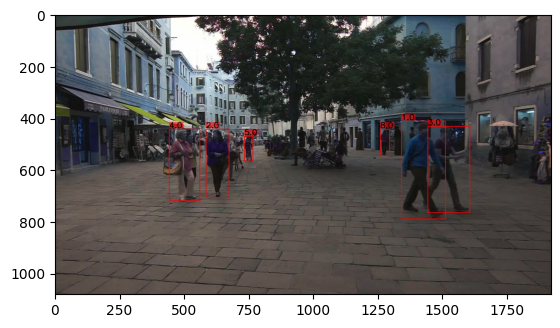

In [ ]:
import cv2

import matplotlib.pyplot as plt

image = cv2.imread('/content/Venice-2/img1/000001.jpg')

results = detector.predict(image, verbose=False)
numpy_detections = convert_yolo_numpy(results[0])
tracks = tracker.update(numpy_detections, image)
print(tracks)
reid_frame = process_frame(image, tracks)

plt.imshow(reid_frame)

In [ ]:
print(iou_counting(1249, 443, 1249+43, 443+105, 1260, 444, 1295, 544))

0.6645898234683282


In [ ]:
def change_image(image, line):
  mas = line.split(',')
  2345
  thickness = 2
  color = [255, 0, 0]
  cv2.rectangle(image, (int(mas[2]), int(mas[3])), (int(mas[2])+int(mas[4]), int(mas[3])+int(mas[5])), color=color, thickness=thickness)
  cv2.putText(image, mas[1], (int(mas[2]), int(mas[3]) - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(255, 0, 0), thickness=2)
  return image


1,1,415,449,129,269,1,-1,-1,-1

1,2,581,443,97,269,1,-1,-1,-1

1,3,1347,415,153,377,1,-1,-1,-1

1,4,1429,423,161,339,1,-1,-1,-1

1,5,621,459,79,193,1,-1,-1,-1

1,10,473,453,103,261,1,-1,-1,-1

1,16,541,459,43,99,1,-1,-1,-1

1,18,1365,429,49,139,1,-1,-1,-1

1,19,1249,443,43,105,1,-1,-1,-1

1,20,1015,431,47,119,1,-1,-1,-1

1,22,975,457,37,79,1,-1,-1,-1

2,1,413,449,131,269,1,-1,-1,-1



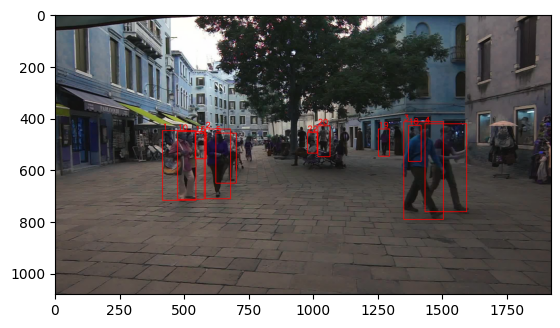

In [90]:
ground_truth_path = '/content/Venice-2/gt/gt.txt'

frame_id = 0
obj_count_real = 0
current_misses = 0
detect_corr = {}
# Зададим переменные для подсчета метрики
false_positives = 0
missed_targets = 0
identity_switches = 0
ground_truth_objects = 0
found_len = 0

image = cv2.imread('/content/Venice-2/img1/000001.jpg')

with open(ground_truth_path, 'r') as file:
    for index, line in enumerate(file):
      print(line)
      image_index = int(line.split(',')[0]) - 1
      if frame_id != image_index:
        break
      image = change_image(image, line)
plt.imshow(image)

In [91]:
import cv2
ground_truth_path = '/content/Venice-2/gt/gt.txt'

frame_id = 0
obj_count_real = 0
current_misses = 0
detect_corr = {}
# Зададим переменные для подсчета метрики
false_positives = 0
missed_targets = 0
identity_switches = 0
ground_truth_objects = 0
found_len = 0

image = cv2.imread(image_paths[0])
results = detector.predict(image, verbose=False)
numpy_detections = convert_yolo_numpy(results[0])
detections = tracker.update(numpy_detections, image)

with open(ground_truth_path, 'r') as file:
    for index, line in enumerate(file):
      print(line)
      ground_truth_objects += 1
      obj_count_real += 1
      image_index = int(line.split(',')[0]) - 1

      if frame_id != image_index:
        frame_id = image_index
        obj_count_real -= 1
        false_positives += (found_len - obj_count_real + current_misses) if (found_len - obj_count_real + current_misses) > 0 else 0
        current_misses = 0
        obj_count_real = 1
        results = detector.predict(image, verbose=False)
        numpy_detections = convert_yolo_numpy(results[0])
        detections = tracker.update(numpy_detections, image)
        detections = [i for i in detections if i[6] == 0]


      image = cv2.imread(image_paths[image_index])
      found_len = process_frame(detections, line)
      print(false_positives, missed_targets, identity_switches)

Выходные данные были обрезаны до нескольких последних строк (5000).
0
0.36307604609022553
0.4776434065582097
0
0
0
0.4776434065582097
1817 5286 568
558,15,415,465,41,105,1,-1,-1,-1

[array([     65.687,      467.41,       226.5,      752.72,       37140,     0.68399,           0,           8]), array([     1301.2,      417.26,      1579.8,      1059.6,       37220,     0.85254,           0,           4]), array([     1448.1,         410,      1618.9,      962.18,       38489,     0.72409,           0,           6]), array([     919.82,      445.42,      1028.9,      756.23,       38537,     0.86733,           0,           0]), array([     790.37,      419.98,      1015.1,      704.45,       38632,     0.71939,           0,           7]), array([     725.45,      435.38,      836.89,      711.57,       38067,     0.84264,           0,           5]), array([     1585.8,      374.89,      1833.6,      1033.8,       38697,     0.86656,           0,           1]), array([     1782.6,      3

In [93]:
# Посчитаем метрику
def calculate_MOTA():
  return 1 - (false_positives + missed_targets + identity_switches) / float(ground_truth_objects)

MOTA = calculate_MOTA()
print(MOTA)

0.12141156700742195


# Трекинг с реидентификацией

Используем StrongSort


In [ ]:
!gdown 1kwWi_nU8Dd3e4cLPoYq1ax5j00R2pMDh

Downloading...
From: https://drive.google.com/uc?id=1kwWi_nU8Dd3e4cLPoYq1ax5j00R2pMDh
To: /content/two_crossing_people.mp4
100% 2.21M/2.21M [00:00<00:00, 214MB/s]


In [ ]:
!wget https://github.com/bharath5673/StrongSORT-YOLO/raw/refs/heads/main/weights/osnet_x0_25_msmt17.pt

--2024-11-25 19:49:22--  https://github.com/bharath5673/StrongSORT-YOLO/raw/refs/heads/main/weights/osnet_x0_25_msmt17.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharath5673/StrongSORT-YOLO/refs/heads/main/weights/osnet_x0_25_msmt17.pt [following]
--2024-11-25 19:49:23--  https://raw.githubusercontent.com/bharath5673/StrongSORT-YOLO/refs/heads/main/weights/osnet_x0_25_msmt17.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9336983 (8.9M) [application/octet-stream]
Saving to: ‘osnet_x0_25_msmt17.pt’

osnet_x0_25_msmt17. 100%[===================>]   8.90M  --.-KB/s    in 0.03s   

20

In [ ]:
# Инициализируем объект модели - генератора эмбеддингов
from boxmot.appearance.reid_auto_backend import ReidAutoBackend
import torch
from pathlib import Path

weights_path = Path('./osnet_x0_25_msmt17.pt') # Подставьте здесь путь к весам найденной модели

2024-11-25 19:49:28.512 | INFO     | boxmot.utils.torch_utils:select_device:52 - Yolo Tracking v11.0.5 🚀 Python-3.10.12 torch-2.2.2+cu121
CUDA:0 (Tesla T4, 15102MiB)
2024-11-25 19:49:28.577 | SUCCESS  | boxmot.appearance.reid_model_factory:load_pretrained_weights:183 - Loaded pretrained weights from osnet_x0_25_msmt17.pt


In [ ]:
# Создадим детектор и трекер
from ultralytics import YOLO

detector = YOLO('yolov8m.pt') # используйте публичные предобученные веса

In [ ]:
from boxmot.trackers.strongsort.strongsort import StrongSort

tracker = StrongSort(weights_path, torch.device(0), False)


2024-11-25 20:10:36.180 | INFO     | boxmot.utils.torch_utils:select_device:52 - Yolo Tracking v11.0.5 🚀 Python-3.10.12 torch-2.2.2+cu121
CUDA:0 (Tesla T4, 15102MiB)
2024-11-25 20:10:36.249 | SUCCESS  | boxmot.appearance.reid_model_factory:load_pretrained_weights:183 - Loaded pretrained weights from osnet_x0_25_msmt17.pt


In [ ]:
def process_frame(frame, detections):
  reid_frame = frame.copy()
  for data in detections:
    if data[6] != 0:
      continue
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    thickness = 2
    color = [255, 0, 0]
    cv2.rectangle(reid_frame, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
    text = str(data[4])
    # calculate text width & height to draw the transparent boxes as background of the text
    (text_width, text_height) = \
    cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2)[0]
    text_offset_x = xmin
    text_offset_y = ymin - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = reid_frame.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    reid_frame = cv2.addWeighted(overlay, 0.6, reid_frame, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(reid_frame, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(0, 0, 0), thickness=2)
  return reid_frame

In [ ]:
# Подготовим объекты для чтения исходного видео и для записи результата

import cv2

cap = cv2.VideoCapture('two_crossing_people.mp4')
writer = cv2.VideoWriter('reID_results.mp4',
                         cv2.VideoWriter_fourcc(*'MP4V'),
                         25,
                         (int(cap.get(3)),int(cap.get(4)))
                        )

fps = cap.get(cv2.CAP_PROP_FPS)

assert cap.isOpened()

while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    break

  results = detector.predict(frame, verbose=False)
  numpy_detections = convert_yolo_numpy(results[0])
  tracks = tracker.update(numpy_detections, frame)

  print(tracks)
  reid_frame = process_frame(frame, tracks)
  writer.write(reid_frame)


cap.release()
writer.release()

[[     1.2556      141.98      126.72      534.99           1     0.94659           0           0]]
[[    0.72348         143      132.27         535           1      0.9457           0           0]]
[[    0.41519         144      135.58         535           1      0.9445           0           0]]
[[   0.079656         144      135.92         535           1     0.94451           0           0]]
[[   0.087803         144      136.92         535           1     0.94362           0           0]]
[[    0.17716         144      138.82         535           1     0.94649           0           0]]
[[    0.52094         144      144.47         536           1     0.94627           0           0]]
[[    0.93848         144      153.05         536           1     0.94613           0           0]]
[[     2.0067      142.01      160.98         536           1     0.93558           0           0]]
[[     1.3367         142      170.65         536           1     0.94139           0           0]]
